# Dataset Preperation

In [41]:
!pip install numpy pandas scipy

In [42]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape

In [43]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
# Same labels will be reused throughout the program
LABELS = ['badminton', 'basketball', 'cycling', 'football', 'skipping', 'tabletennis']

# The number of steps within one time segment
TIME_PERIODS = 256
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 16

In [44]:
!gdown 1RXVHNXOPgajxmpzIrk-en9h8MxQM4EAa

Downloading...
From: https://drive.google.com/uc?id=1RXVHNXOPgajxmpzIrk-en9h8MxQM4EAa
To: /content/combined_AU-SD.csv
100% 6.16M/6.16M [00:00<00:00, 38.5MB/s]


In [45]:
df = pd.read_csv("combined_AU-SD.csv")

In [46]:
df.head()

,Unnamed: 0,Unnamed: 0.1,wx,wy,wz,nx,ny,nz,tx,ty,tz,Gender,Act
0,0,0,12.0,-9.9,-6.5,-1.4,7.1,2.8,1.7,-0.4,5.5,M,badminton
1,1,1,12.1,-10.1,-7.3,-1.7,7.5,2.9,0.4,2.7,8.3,M,badminton
2,2,2,13.4,-10.4,-8.0,-2.0,7.9,3.1,-0.6,6.6,9.0,M,badminton
3,3,3,15.3,-11.0,-8.4,-2.3,8.2,3.4,-1.3,9.9,7.1,M,badminton
4,4,4,16.9,-10.9,-7.9,-2.4,8.2,3.6,-2.5,11.9,4.4,M,badminton


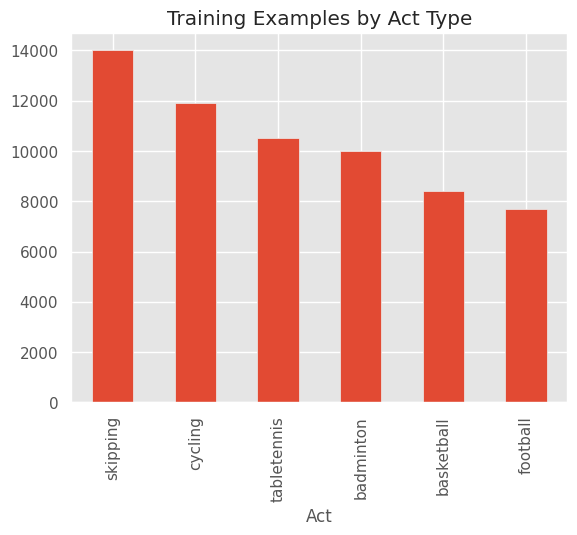

In [47]:
# Show how many training examples exist for each of the six activities
df['Act'].value_counts().plot(kind='bar', title='Training Examples by Act Type')
plt.show()

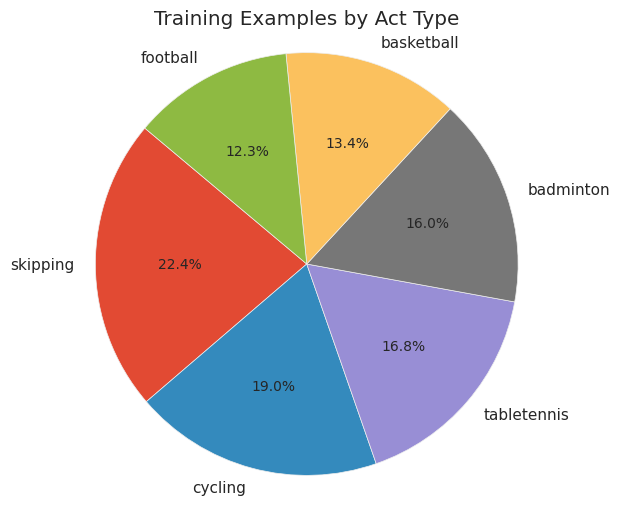

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Show how many training examples exist for each of the six activities
activity_counts = df['Act'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Training Examples by Act Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [49]:
df['Act'].value_counts()

Act
skipping       14000
cycling        11900
tabletennis    10500
badminton      10000
basketball      8400
football        7700
Name: count, dtype: int64

In [50]:
# Define column name of the label vector
LABEL = 'Act'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df[LABEL] = le.fit_transform(df['Act'].values.ravel())

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62500 entries, 0 to 62499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    62500 non-null  int64  
 1   Unnamed: 0.1  62500 non-null  int64  
 2   wx            62500 non-null  float64
 3   wy            62500 non-null  float64
 4   wz            62500 non-null  float64
 5   nx            62500 non-null  float64
 6   ny            62500 non-null  float64
 7   nz            62500 non-null  float64
 8   tx            59500 non-null  float64
 9   ty            59500 non-null  float64
 10  tz            59500 non-null  float64
 11  Gender        62500 non-null  object 
 12  Act           62500 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 6.2+ MB


In [52]:
import numpy as np
import pandas as pd
from scipy import stats

In [53]:
import numpy as np
import pandas as pd
from scipy import stats

# Load your dataset into the Colab environment (if not already loaded)
# For example, if you uploaded a file named "data.csv":
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('data.csv')

def create_segments_and_labels(df, time_steps, step, label_name):
    N_FEATURES = 6
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        wx = df['wx'].values[i: i + time_steps]
        wy = df['wy'].values[i: i + time_steps]
        wz = df['wz'].values[i: i + time_steps]
        nx = df['nx'].values[i: i + time_steps]
        ny = df['ny'].values[i: i + time_steps]
        nz = df['nz'].values[i: i + time_steps]
        label_slice = df[label_name][i: i + time_steps]
        label_mode = stats.mode(label_slice)

        if isinstance(label_mode.mode, np.ndarray):
            label = label_mode.mode[0]
        else:
            label = label_mode.mode

        segments.append([wx,wy,wz,nx,ny,nz])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_data, y_data = create_segments_and_labels(df, TIME_PERIODS, STEP_DISTANCE, LABEL)


In [54]:
# Set input & output dimensions
num_classes = le.classes_.size
labels=list(le.classes_)
print(list(le.classes_))

['badminton', 'basketball', 'cycling', 'football', 'skipping', 'tabletennis']


#Deep Leanring Model

In [55]:
import tensorflow as tf

In [56]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [57]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [58]:
from tensorflow.keras.layers import add, Activation
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, concatenate, Flatten, Dense, Bidirectional, GRU, Multiply

In [59]:
def create_model(trainX, trainy):
#  verbose, epochs, batch_size = 0, 50, 64
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  input_shape=(n_timesteps,n_features)
  #input to block "a"

  signal_input = Input(shape=input_shape, name='data')
  #<-------------------------------------------------------------Module 1------------------------------------------->

  layer_1_a = Conv1D(filters=10,  kernel_size=1, padding='same', activation='relu',name='1x1_a_3')(signal_input) #with 1x1 conv
  #layer_1_a = Conv1D(filters=10,  kernel_size=3, padding='same', activation='relu',name='1x3_a')(layer_1_a) # with 1x3

  layer_2_a = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_a_5')(signal_input) #with 1x1
  layer_2_a = Conv1D(10,  kernel_size=3, padding='same', activation='relu',name='1x5_a')(layer_2_a)#with 1x5

  mid_1_a=add([layer_1_a,layer_2_a])


  #mid_1_a = keras.layers.concatenate([layer_1_a, layer_2_a], axis = 2)

  #<------------------------------------------------------------Concatenated Module 1 with input---------------------->
  #<-----1x1 x64 layer ----->
  mid_1_a=Conv1D(filters=9,  kernel_size=1, padding='same', activation='relu',name='a_1x1_size_reduce')(mid_1_a)



  #<-----Ending network ----->
  before_flat=Conv1D(filters=6,  kernel_size=1, padding='same', activation='relu',name='before_2_1x1_size_reduce')(mid_1_a)

  globelAverage=keras.layers.GlobalAveragePooling1D(data_format='channels_last')(before_flat)

  out = Dense(n_outputs, activation='softmax', name='predictions')(globelAverage)

  rez = Model(inputs=signal_input, outputs=out)

  return rez

In [60]:
from keras.utils import to_categorical


Epoch 1: val_accuracy improved from -inf to 0.46454, saving model to best_model.keras

Epoch 2: val_accuracy did not improve from 0.46454

Epoch 3: val_accuracy did not improve from 0.46454

Epoch 4: val_accuracy did not improve from 0.46454

Epoch 5: val_accuracy improved from 0.46454 to 0.55190, saving model to best_model.keras

Epoch 6: val_accuracy improved from 0.55190 to 0.55961, saving model to best_model.keras

Epoch 7: val_accuracy improved from 0.55961 to 0.60123, saving model to best_model.keras

Epoch 8: val_accuracy improved from 0.60123 to 0.67472, saving model to best_model.keras

Epoch 9: val_accuracy improved from 0.67472 to 0.73741, saving model to best_model.keras

Epoch 10: val_accuracy improved from 0.73741 to 0.77492, saving model to best_model.keras

Epoch 11: val_accuracy improved from 0.77492 to 0.78726, saving model to best_model.keras

Epoch 12: val_accuracy improved from 0.78726 to 0.80987, saving model to best_model.keras

Epoch 13: val_accuracy improved f

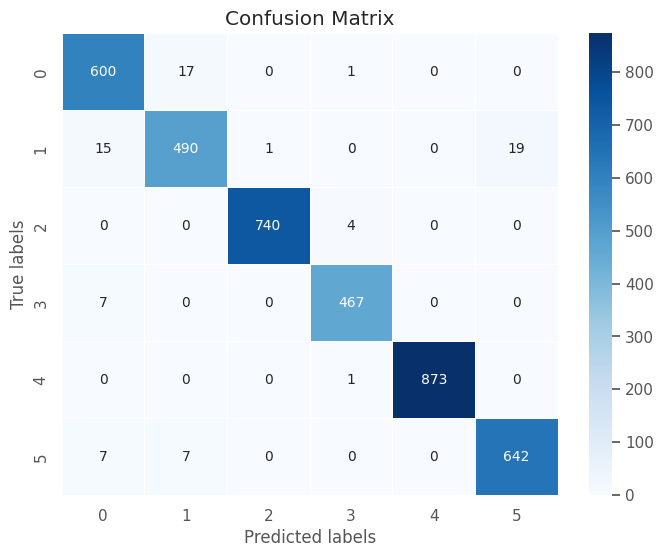

In [61]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Model
from keras.layers import Conv1D, Input, add, Dense
import keras
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_data and y_data are your feature and target data, respectively
kf = KFold(n_splits=2, shuffle=True, random_state=42) # for segmentation window made k =2

# Initialize variables to store the best model and its accuracy
best_model = None
best_accuracy = 0.0
all_true = []
all_pred = []

for train_index, test_index in kf.split(x_data):
    X_train, X_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    # Create the model
    model = create_model(X_train, y_train)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Train the model and use the ModelCheckpoint callback
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0, validation_data=(X_test, y_test), callbacks=[checkpoint])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Store true and predicted values for later
    all_true.extend(y_true_classes)
    all_pred.extend(y_pred_classes)

    # Check if the current model has a better validation accuracy than the previous best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        # Load the best model saved by ModelCheckpoint
        best_model = keras.models.load_model('best_model.keras')
        print("Best Model Updated")

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(all_true, all_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
model.save('trained-Model.keras')

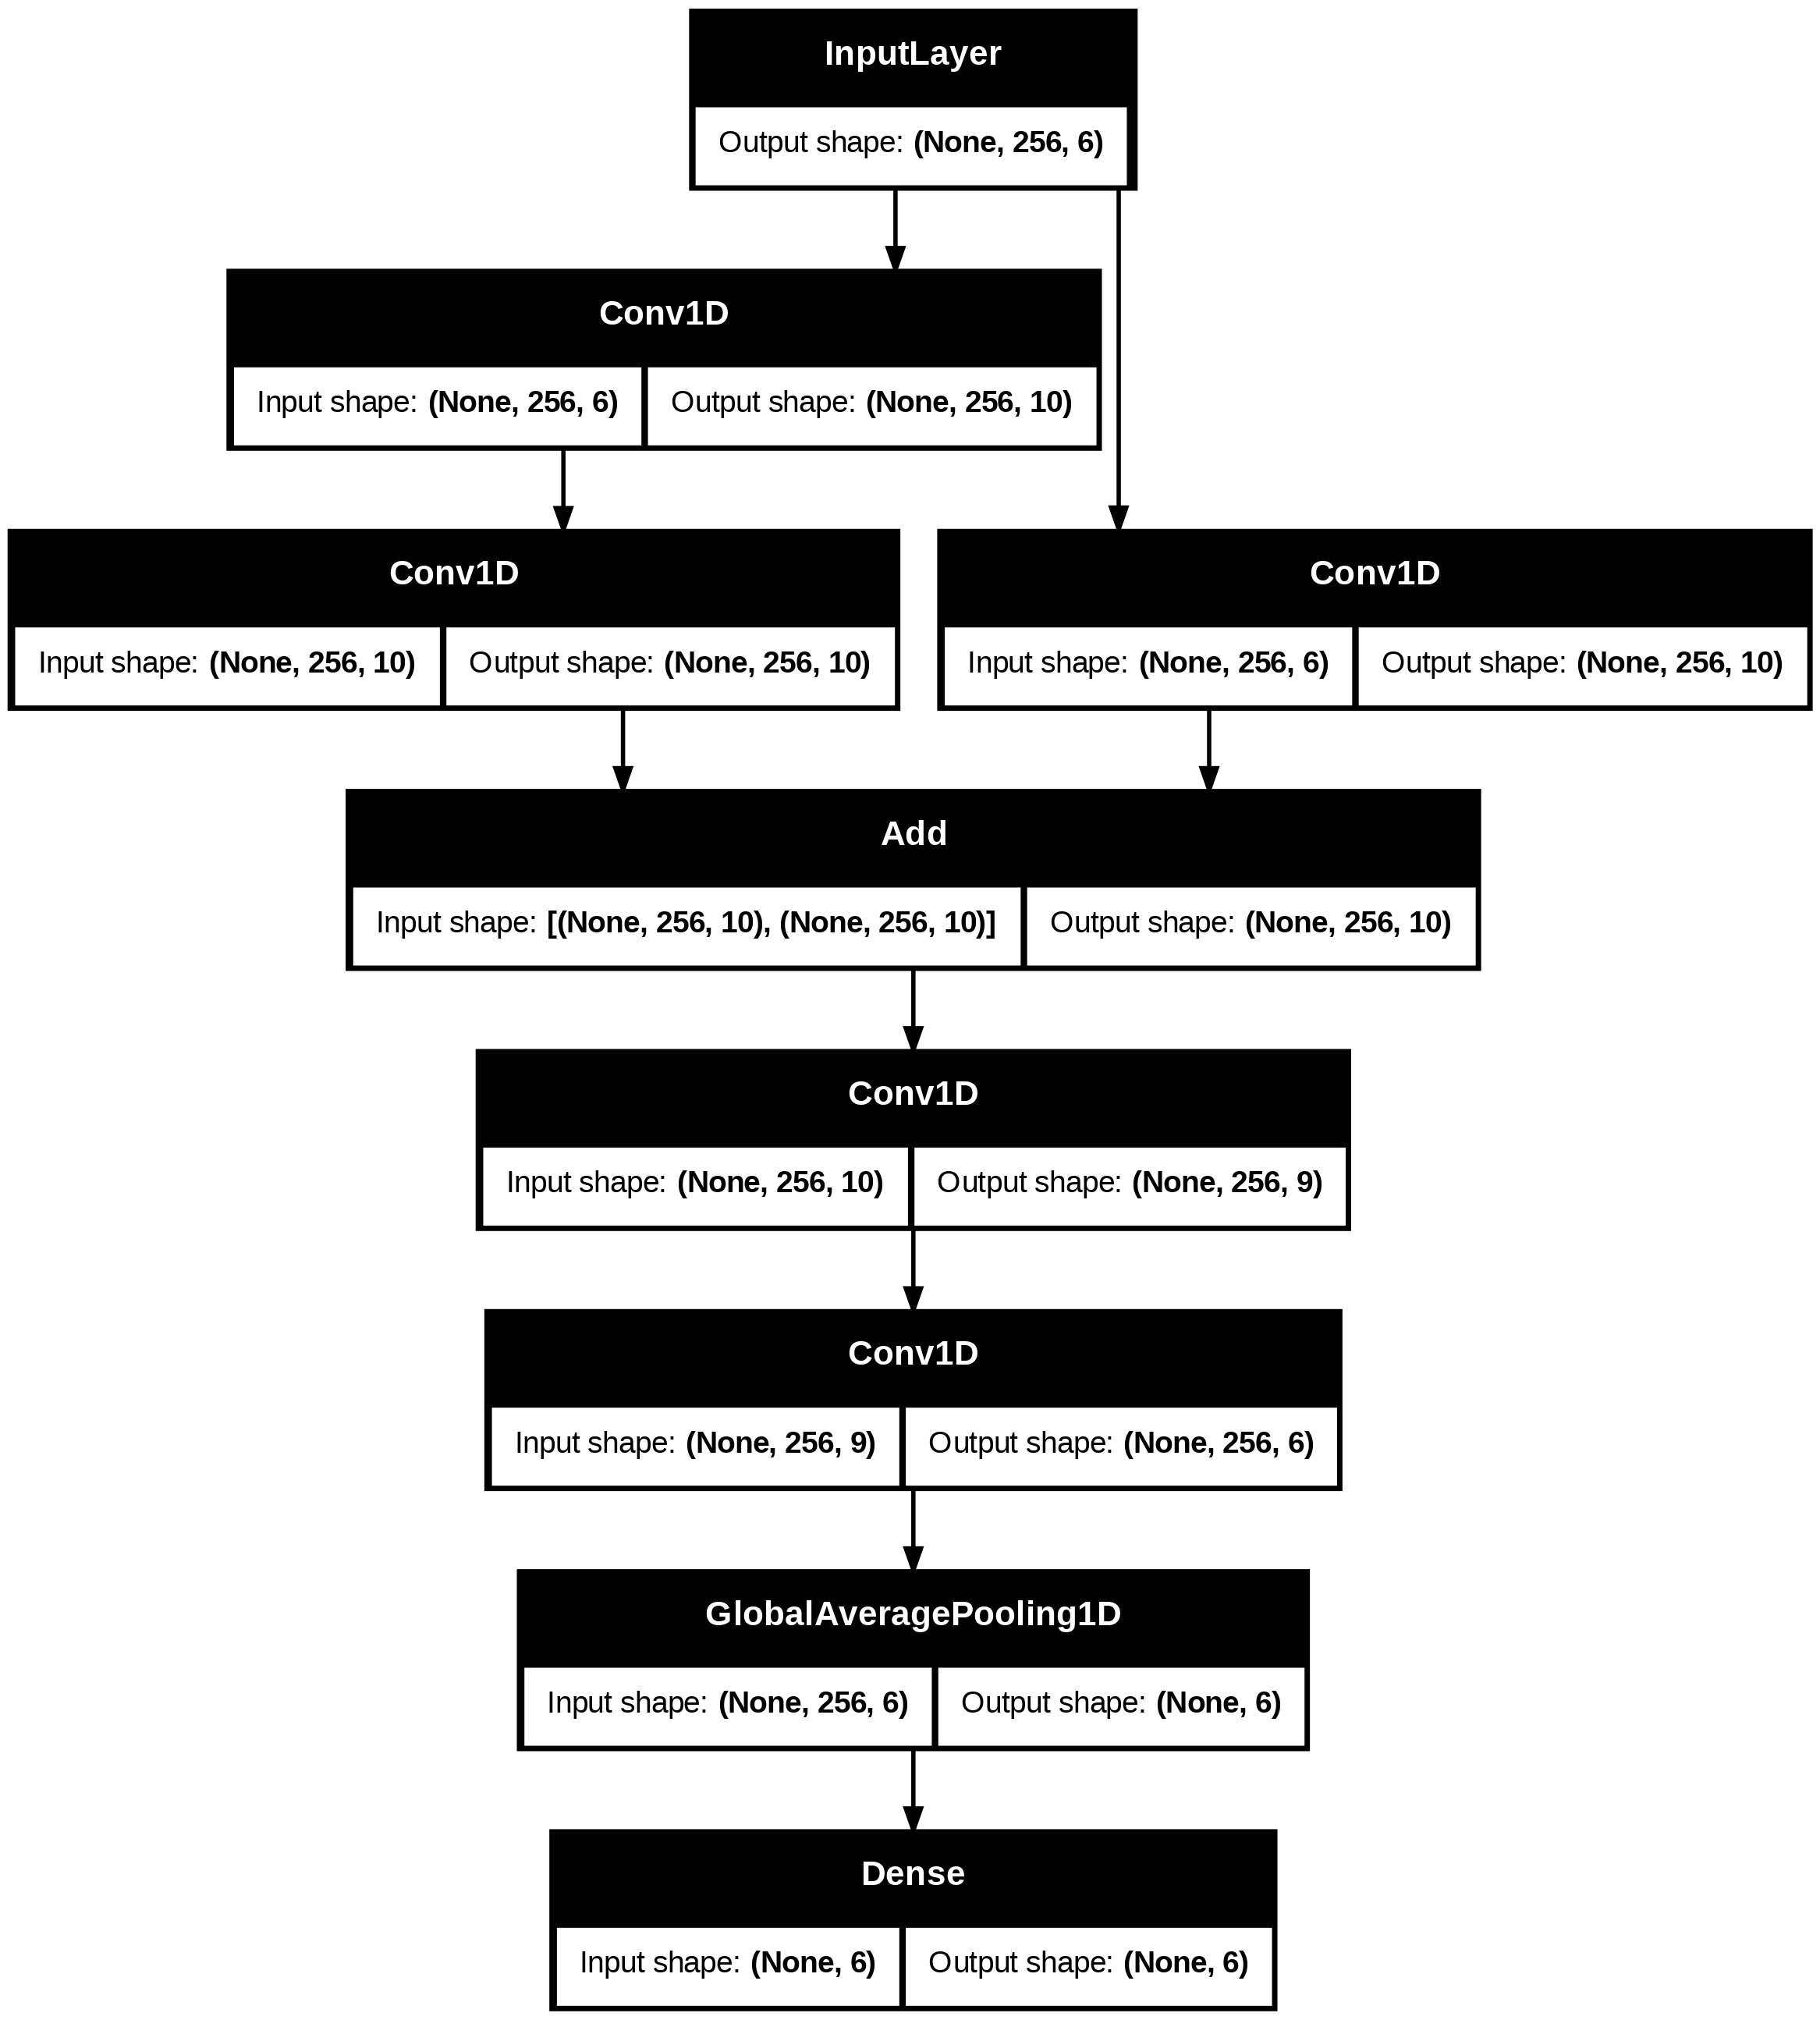

In [63]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [64]:
labels=['badminton', 'basketball', 'cycling', 'football', 'skipping', 'tabletennis']

In [65]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred,normalize="true")
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(6, 6))
    ax = sn.heatmap(df_cm, annot=True, square=True,cmap="Blues", linewidths=.2, cbar_kws={"shrink": 0.8})
    return ax

<Axes: >

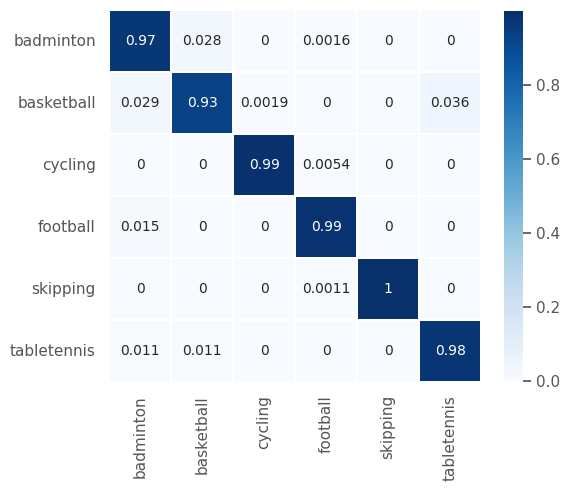

In [66]:
plot_confusion_matrix(all_true, all_pred,labels)

<Axes: >

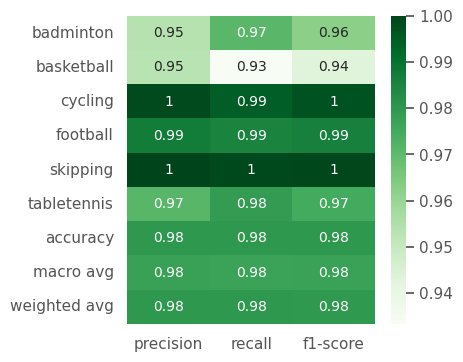

In [67]:
from sklearn.metrics import classification_report
import seaborn as sns
y_pred=all_pred
y_test=all_true
report= classification_report(y_test,y_pred,target_names=labels,output_dict=True)
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T,cmap="Greens", annot=True)

In [68]:
!python --version

Python 3.10.12
